# App Behavior Analysis - Directing Customers to Subscription (part 2/2)

### Importing the Data 

In [1]:
# Importing numpy, pandas and Series + DataFrame:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Imports for plotting and stats:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Loading the data and importing time library:
dataset = pd.read_csv('new_appdate10.csv')
import time

### Model Training and Finding a Problem Solution 

In [3]:
# Assign enrolled feature to response and drop enrolled column from dataset:
response = dataset['enrolled']
dataset = dataset.drop(columns = 'enrolled')

In [4]:
# Display first 5 rows of dataset:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,1,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,0,1,0,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,0,1,...,0,0,0,0,0,10,0,2,0,1


### Splitting the data into a training and testing set: 

In [5]:
# For splitting data we will be using train_test_split from sklearn:
from sklearn.model_selection import train_test_split

In [6]:
# Splitting the data into test and train, we are testing on 0.2 = 20% of dataset:
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size=0.2, random_state=0)

In [7]:
train_identifier = X_train['user']
X_train = X_train.drop(columns = 'user')
test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')

In [8]:
# Balancing the Training Set
import random
y_train.value_counts()

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]


In [9]:
# Importing StandardScaler:
from sklearn.preprocessing import StandardScaler

# Feature scaling:
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


### Building the model 

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
# Importing metrics for checking a model accuracy:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

In [13]:
# Accuracy_score:
accuracy_score(y_test, y_pred)

0.767

In [14]:
# Precision_score:
precision_score(y_test, y_pred)

0.7594886136636037

In [15]:
# Recall_score:
recall_score(y_test, y_pred)

0.7715097402597403

In [16]:
# F1_score:
f1_score(y_test, y_pred)

0.7654519830883835

Test data accuracy: 0.7670


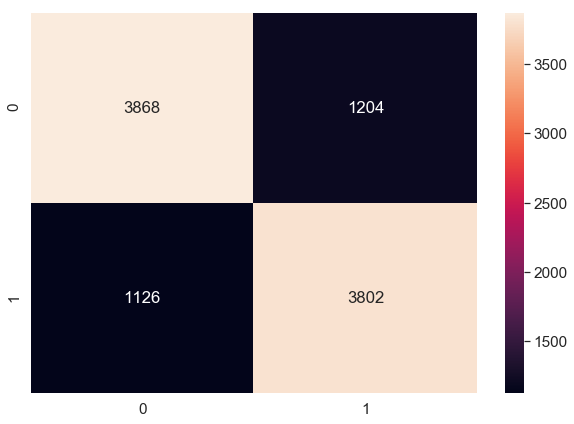

In [17]:
# Confusion matrix (heatmap):
df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt = 'g')

print ('Test data accuracy: %0.4f' %accuracy_score(y_test,y_pred))

In [18]:
# Cross validation score:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

print ('Logistic accuracy: %0.3f (+/- %0.3f)' %(accuracies.mean(), accuracies.std( )*2))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

Logistic accuracy: 0.766 (+/- 0.010)


In [19]:
# Combine user ID, enrolled and predicted_results into one DataFrame:
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()
final_results ['predicted_results'] = y_pred
final_results [['user','enrolled', 'predicted_results']]

,user,enrolled,predicted_results
11841,239786,1,1
19602,279644,1,1
45519,98290,0,0
25747,170150,1,1
42642,237568,1,1
31902,65042,1,0
30346,207226,1,1
12363,363062,0,0
32490,152296,1,1
26128,64484,0,0
